***

# K - Means

***


#### What is it? 
> K - Means clustering is an unsupervised machine learning algorithm that aggregates data points together into clusters based off of certain feature similarities. Some applications of clustering include the following:

            - Image Segmentation
            - Document Clustering
            - Customer Segmentation
            



#### How does it work?
> The goal of the algorithm is to group, or cluster, data points based off of feature similarities. Properties of clusters are as follows:

        - Data points in the same cluster should be most similar to each other
        - Data points from different clusters should be dissimilar to each other
        


> The algorithm achieves clustering by minimizing the distance between data points and their respective cluster's centroid. Distance is calculated using the euclidean distance. The formula is shown below:

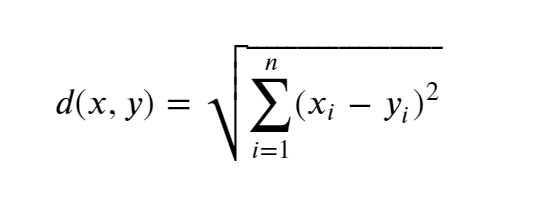

> K- means clustering algorithm can be simplified into five steps:
    
        1. Choose k, the number of clusters
        2. Select k random points from the data as centroids
        3. Assign all points to the closest centroid
        4. Recompute centroids of the newly formed clusters
        5. Repeat steps 3 and 4 until convergence

### Model Implementation

> Below is an implementation of the K - means clustering model on a dataset. 





#### Libraries Used

> A list of libraries used for data visualizations, data preparation, and model building:
    
[Matplotlib](https://matplotlib.org/)

[Numpy](https://numpy.org/)

[Pandas](https://pandas.pydata.org/)

[make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)

In [1]:
#import libraries

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from sklearn.datasets import make_blobs


#### Data Preparation


>Before model building and model implementation, a dataset will be prepared for use. Below, the make blobs dataset is imported. The dataset is loaded in with two features and 700 samples. X contains the two features, while y contains the integer labels for cluster membership. We will only feed X into the model. For more information on the dataset, you can scroll up to the "Libraries Used" header and select the hyper link "make_blobs" or click [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [2]:
#load make_blobs

X, y = make_blobs(centers=3, n_samples=700, n_features=2, shuffle=True, random_state=40)


> With the data now prepared, we are now ready to visualize the data. Based on the plot below, as expected, we can see that there is clear separation between concentrated areas of data points. 

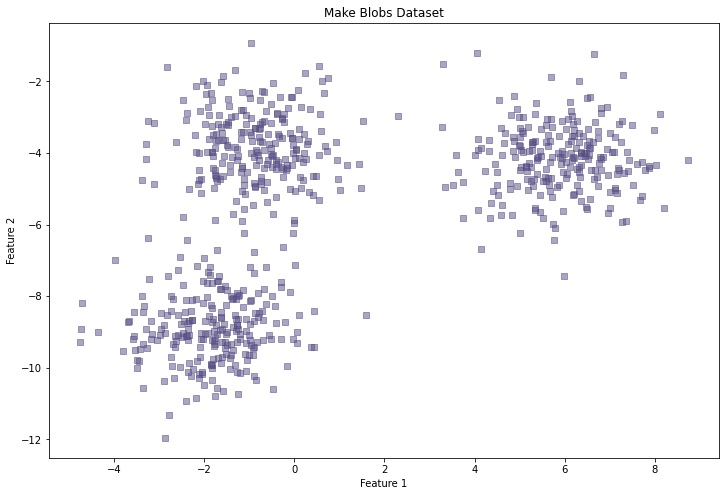

In [3]:
#scatter plot of make blobs data
fig, plot = plt.subplots(figsize=(12, 8))

plt.scatter(X[:,0], X[:,1], 
            marker = "s", 
            alpha = .5, 
            color = "#574E84")

plt.xlabel('Feature 1')  
plt.ylabel('Feature 2')
plt.title("Make Blobs Dataset")

plt.show()

#### Model Building Steps

> With data preparation now complete, model building can now begin. Here are the steps:
    
        1. Choose k, the number of clusters
        2. Select k random points from the data as centroids
        3. Assign all points to the closest centroid
        4. Recompute centroids of the newly formed clusters
        5. Repeat steps 3 and 4 until convergence
    
   

#### Model Building

> Below the model is built using a class. The steps outlined above are clearly commented in the code below. 


In [4]:
#function for euclidean distance
def euclideanDistance(p, q):
    return np.sqrt(np.sum((p-q)**2))

In [5]:
class KMeanClustering:
    
    #Step 1, choose k. k defaulted to 3
    #plotSteps is set equal to false by default
    
    def __init__(self, K=3, maxIters = 100, plotSteps=False):
        self.K = K
        self.max_iters = maxIters
        self.plot_steps = plotSteps

        #list of sample indices for each cluster
        self.clusters = [[] for i in range(self.K)]
        
        # the centers for each cluster
        self.centroids = []
        
        
        
        
    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #Step 2: Select k random points from the data as centroids
        
        # initialize centroids: 
        #This will randomly choose k indices
        random_sample_idxs = np.random.choice(self.n_samples, self.K, replace=False)
        
        #get randomly chosen centroids using the indices found previously
        self.centroids = [self.X[idx] for idx in random_sample_idxs]

        
        # Optimization here:
        for i in range(self.max_iters):
            
            #Step 3: Assign all the points to the closest cluster centroid
            
            #clusters created/updated
            self.clusters = self._create_clusters(self.centroids)

            #plot after clusters are updated
            if self.plot_steps == True:
                self.plot()

                
            #Step 4: Recompute centroids of newly formed clusters
            
            #Update centroids: Calculate new centroids from the clusters
            centroids_old = self.centroids
            self.centroids = self._get_centroids(self.clusters)

            
            #Step 5, repeat steps 3 and 4 until convergence
            
            # check if converged
            if self._is_converged(centroids_old, self.centroids):
                break #break if converged
  
            #plot after centroids are updated
            if self.plot_steps == True:
                self.plot()

        #return cluster labels
        return self._get_cluster_labels(self.clusters), self.plot()
           
    
    
    def _closest_centroid(self, sample, centroids):
        
        ##distance of current sample to each centroid are calcualted 
        #euclidean distance is used to get distance
        distances = [euclideanDistance(sample, point) for point in centroids]
        
        #get index of minimum distance
        closest_index = np.argmin(distances)
        
        return closest_index   
    
    
    
    # Assign the samples to the closest centroids to create clusters
    def _create_clusters(self, centroids):
        
        clusters = [[] for i in range(self.K)]
        
        #iterate over data
        for idx, sample in enumerate(self.X): 
            
            #get index of the min. distance of current sample to each centroid
            centroid_idx = self._closest_centroid(sample, centroids)
            
            clusters[centroid_idx].append(idx)
        
        return clusters

    

    def _get_centroids(self, clusters):
        
        #intialize centroids with zeros
        centroids = np.zeros((self.K, self.n_features))
        
        #iterate over clusters and calculate cluster mean
        for cluster_idx, cluster in enumerate(clusters):
            
            cluster_mean = np.mean(self.X[cluster], axis=0)
            
            #assign mean to current centroid. these serve as new centroids
            centroids[cluster_idx] = cluster_mean
             
        return centroids
    

    
    def _is_converged(self, centroids_old, centroids):
        
        # caculate distances between each old and new centroids,
        #and checks if the distance is zero
        distances = [euclideanDistance(centroids_old[i], centroids[i]) 
                     for i in range(self.K)]
        
        return sum(distances) == 0 #if zero, then it is converged
    
    
    
    def _get_cluster_labels(self, clusters):
        
        #create empty array to hold labels
        labels = np.empty(self.n_samples)
        
        # each sample will get the "label" of the cluster they are assigned to
        #the "labels" are the index of the cluster they are assigned to
        for cluster_idx, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = cluster_idx
                
        return labels
    
    

    #plots the clusters and centroids at each iteration if True
    def plot(self):
        fig, plot = plt.subplots(figsize=(12, 8))
        

        #plot all points for each cluster in a different color
        for i, index in enumerate(self.clusters):
            #colors for clusters
            colors = ["#574E84", "#90C2CE", "#3309E8"]
            
            point = self.X[index].T
            plot.scatter(*point, alpha = .5, marker = "s", c = colors[i])

        #plots the centroid as little "o"s
        for point in self.centroids:
            plot.scatter(*point, marker="o", color="black", linewidth=6)
        
        plt.xlabel('Feature 1')
        
        plt.ylabel('Feature 2')
        
        plt.title("Make Blobs Dataset Clustered")

        plt.show()
        

#### Visualizing Clusters Using Data on Model

> Below is a plot showing the final k, or 3, clusters after convergence. The black points on the plots represents the centroids for each cluster. 

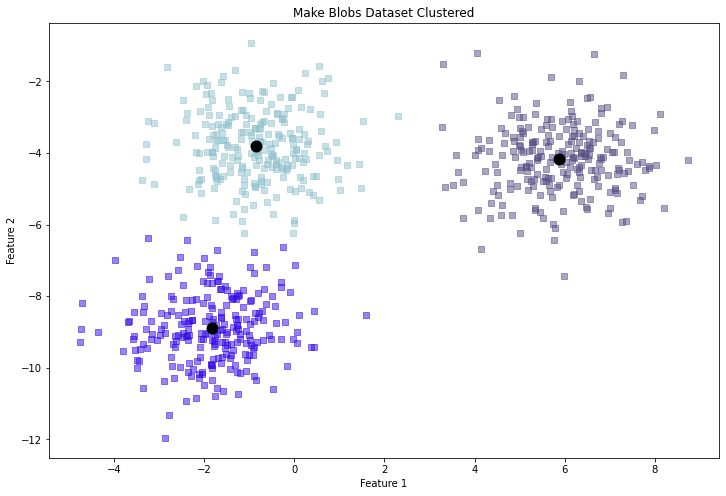

In [6]:
clusters = len(np.unique(y)) #k set to unique values in y

#setting plotSteps = True should show the plot after each iteration
kMeans = KMeanClustering(K=clusters, maxIters=150, plotSteps=False)

pred = kMeans.predict(X) #this returns sample "labels" of the cluster they are assigned to

> The K -means model was able to successfully cluster the data into three reasonable clusters. Although K-means worked really well on this dataset with k=3, a way to determine an optimal value for k is the elbow method. The elbow method is a plot of WCSS (the sum of squared distance between each point and the centroid) against the number of clusters. The "elbow point" on the plot gives you the optimal number of clusters (k). This is shown below:

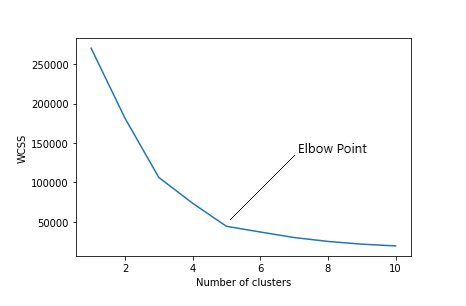


#### Conclusion

> This concludes the section on K-means clustering.